En un torneo de tenis juegan $k$ jugadores (alguna potencia de 2). Los jugadores son clasificados por las asociaciones mediante un puntaje que tiene en cuenta su rendimiento y la calidad de los torneos en que ha participado. Así tenemos que los $k$ jugadores tienen puntajes $p_1, p_2, \cdots, p_k$. Suponga que la probabilidad que el jugador $i$ le gane al $j$ se puede aproximar como
$$
P(i \text { gane a } j)=\frac{p_i}{p_i+p_j}
$$

El torneo se estructura de la siguiente manera: El mejor jugador se enfrenta con el más malo, el segundo mejor con el segundo más malo, y así sucesivamente.

torneo es de eliminación simple (jugador que pierde se va). En cada ronda se aplica la misma regla.

Si tenemos 16 jugadores y sus puntajes son $900,870,740,730,720,715,710,700$, $650,630,600,550,500,480,450,400$, calcule:
- La probabilidad que el jugador más malo gane el torneo.
- Que el mejor jugador gane el torneo.

Para calcular las probabilidades, necesitamos considerar cada ronda del torneo por separado. En cada ronda, el jugador con el puntaje más alto se enfrenta al jugador con el puntaje más bajo, el segundo puntaje más alto se enfrenta al segundo puntaje más bajo, y así sucesivamente.



In [80]:
def calcular_probabilidad(puntajes):
    """
    Calcula las probabilidades de ganar para cada jugador en un torneo.

    Args:
        puntajes (list): Una lista de puntajes de los jugadores.

    Returns:
        list: Una lista de probabilidades de ganar para cada jugador.
    """
    # Ordenar los puntajes en orden descendente
    puntajes.sort(reverse=True)

    # Inicializar las probabilidades de ganar para cada jugador
    probabilidad_ganar = [1] * len(puntajes)

    # Para cada ronda del torneo
    for ronda in range(int(len(puntajes)/2)):
        # Para cada partido en la ronda
        for i in range(int(len(puntajes)/2)):
            # Calcular la probabilidad de que cada jugador gane el partido
            probabilidad_ganar[i] *= puntajes[i] / (puntajes[i] + puntajes[-i-1])
            probabilidad_ganar[-i-1] *= puntajes[-i-1] / (puntajes[i] + puntajes[-i-1])

        # Eliminar a los jugadores que perdieron en esta ronda
        puntajes = puntajes[:int(len(puntajes)/2)]

    # Devolver las probabilidades de ganar para cada jugador
    return probabilidad_ganar

# Puntajes de los jugadores
puntajes = [900,870,740,730,720,715,710,700,650,630,600,550,500,480,450,400]

# Calcular las probabilidades
probabilidades = calcular_probabilidad(puntajes)

# Imprimir las probabilidades
print("Probabilidad de que el jugador más malo gane el torneo: ", probabilidades[-1])
print("Probabilidad de que el mejor jugador gane el torneo: ", probabilidades[0])


Probabilidad de que el jugador más malo gane el torneo:  0.029633021652362413
Probabilidad de que el mejor jugador gane el torneo:  0.109331632285776


Una forma equivalente de calcular la probabilidad de que un jugador gane a otro, basada en sus puntos. La fórmula original es:

$$
P(i \text { gane a } j)=\frac{p_i}{p_i+p_j}
$$

Donde $p_i$ y $p_j$ son los puntos de los jugadores $i$ y $j$, respectivamente. Esta fórmula se puede simplificar si dividimos ambos el numerador y el denominador por $p_j$, obteniendo:

$$
P(i \text { gane a } j)=\frac{\frac{p_i}{p_j}}{\frac{p_i}{p_j}+1}
$$

Ahora, si definimos $r_{ij} = \frac{p_i}{p_j}$ como la razón de los puntos entre los jugadores $i$ y $j$, podemos escribir la fórmula anterior como:

$$
P(i \text { gane a } j)=\frac{r_{ij}}{r_{ij}+1}
$$

Esta es la fórmula que usa el código que te di, solo que en lugar de usar la razón de los puntos, usa directamente los puntos. Es decir, el código hace algo así:

```python
np.random.choice(ii, p=np.array(ii)/sum(ii))
```

Donde `ii` es una lista con los puntos de los dos jugadores que compiten, y `np.array(ii)/sum(ii)` es una lista con las probabilidades de que cada jugador gane, usando la fórmula que acabamos de ver. \
Ejemplo, si los puntos de los jugadores son 20 y 30, el código haría esto:

```python
np.random.choice([20, 30], p=[20/(20+30), 30/(20+30)])
```

Que es lo mismo que:

```python
np.random.choice([20, 30], p=[0.4, 0.6])
```

Estas probabilidades son las mismas que se obtienen usando la fórmula original:

$$
P(20 \text { gane a } 30)=\frac{20}{20+30}=0.4
$$

$$
P(30 \text { gane a } 20)=\frac{30}{20+30}=0.6
$$




La probabilidad de que el participante con el menor puntaje gane es 0.0155
La probabilidad de que el participante con el mayor puntaje gane es 0.111


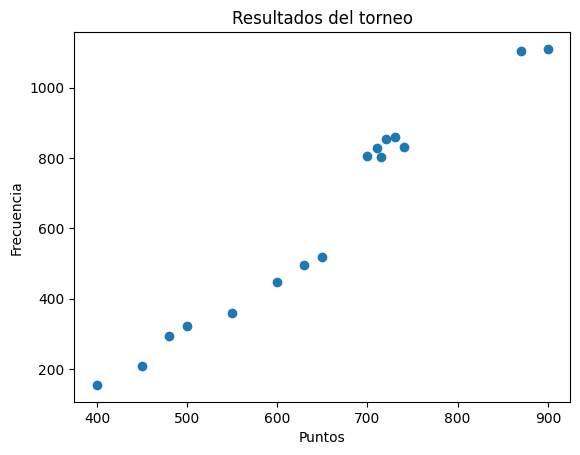

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def un_torneo(puntos):
    """
    Simulates a tournament where players compete based on their points.

    Args:
        puntos (list): A list of points for each player.

    Returns:
        float: The final score of the winning player.
    """
    n_jug = len(puntos)
    for i in range(1, n_jug // 2 + 1):
        if n_jug / (2**i) == 1:
            break

    puntos_temp = puntos
    for j in range(i):
        puntos_temp = sorted(puntos_temp) # Ordenar los puntajes
        nn = len(puntos_temp) # Número de jugadores
        nn_2 = nn // 2
        jugadores = list(zip(puntos_temp[:nn_2], puntos_temp[nn_2:])) # Emparejar los jugadores
        ganador = []
        for ii in jugadores:
            ganador.append(np.random.choice(ii, p=np.array(ii)/sum(ii))) # Elegir al ganador de cada pareja
        puntos_temp = ganador

    return puntos_temp[0]

puntos_iniciales = [900, 870, 740, 730, 720, 715, 710, 700, 650, 630, 600, 550, 500, 480, 450, 400]
num_simulaciones = 10000

resultados = []
for _ in range(num_simulaciones):
    resultados.append(un_torneo(puntos_iniciales))


temp = Counter(resultados) # Contar los resultados

# Calcular las probabilidades
prob_menor = temp[min(puntos_iniciales)] / num_simulaciones
prob_mayor = temp[max(puntos_iniciales)] / num_simulaciones

print(f"La probabilidad de que el participante con el menor puntaje gane es {prob_menor}")
print(f"La probabilidad de que el participante con el mayor puntaje gane es {prob_mayor}")

# Crear scatter plot de los resultados
x = list(temp.keys())
y = list(temp.values())
plt.scatter(x, y)
plt.title('Resultados del torneo')
plt.xlabel('Puntos')
plt.ylabel('Frecuencia')
plt.show()


Sin modificar la formula, se ve un comportamiento similar a lo antes calculado


Probabilidad de que el jugador más débil gane el torneo: 0.0288
Probabilidad de que el mejor jugador gane el torneo: 0.0972


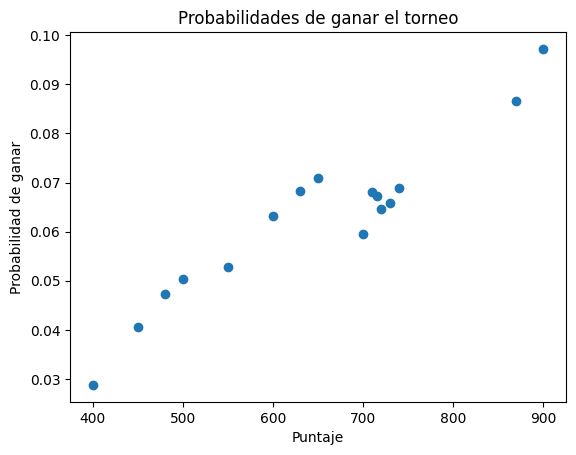

In [2]:
import numpy as np

# Definimos los puntajes de los jugadores
puntajes = [900, 870, 740, 730, 720, 715, 710, 700,
            650, 630, 600, 550, 500, 480, 450, 400]

# Función para calcular la probabilidad de que el jugador i le gane al jugador j
def calcular_probabilidad(i, j):
    return puntajes[i] / (puntajes[i] + puntajes[j])

# Función para simular un enfrentamiento entre dos jugadores
def enfrentamiento(i, j):
    prob_i_gane = calcular_probabilidad(i, j)
    return np.random.choice([i, j], p=[prob_i_gane, 1 - prob_i_gane])

# Función para simular un torneo de eliminación simple
def simular_torneo():
    # Inicializamos la lista de jugadores
    jugadores = list(range(len(puntajes)))
    
    # Mientras quede más de un jugador en la lista
    while len(jugadores) > 1:
        proxima_ronda = []
        # Iteramos sobre la lista de jugadores de dos en dos
        for i in range(0, len(jugadores), 2):
            # Simulamos un enfrentamiento entre los jugadores i y i+1
            ganador = enfrentamiento(jugadores[i], jugadores[i+1])
            # Agregamos al ganador a la próxima ronda
            proxima_ronda.append(ganador)
        # Los jugadores que ganaron pasan a ser los jugadores de la próxima ronda
        jugadores = proxima_ronda
    # Devolvemos al único jugador restante (el ganador del torneo)
    return jugadores[0]

# Función para simular el torneo n veces y contar cuántas veces gana cada jugador
def simular_varias_veces(n):
    conteo_ganadores = [0] * len(puntajes)
    for _ in range(n):
        ganador = simular_torneo()
        conteo_ganadores[ganador] += 1
    return conteo_ganadores

# Simulamos el torneo 10000 veces
n_simulaciones = 10000
conteo_ganadores = simular_varias_veces(n_simulaciones)

# Calculamos las probabilidades de ganar para cada jugador
probabilidades_ganar = [conteo / n_simulaciones for conteo in conteo_ganadores]

# La probabilidad de que el jugador más débil gane el torneo es la probabilidad de que el último jugador gane
probabilidad_jugador_malo = probabilidades_ganar[-1]
print(f"\nProbabilidad de que el jugador más débil gane el torneo: {probabilidad_jugador_malo:.4f}")

# La probabilidad de que el mejor jugador gane el torneo es la probabilidad de que el primer jugador gane
probabilidad_mejor_jugador = probabilidades_ganar[0]
print(f"Probabilidad de que el mejor jugador gane el torneo: {probabilidad_mejor_jugador:.4f}")


# Plot Scatter
import matplotlib.pyplot as plt

x = puntajes
y = probabilidades_ganar
plt.scatter(x, y)
plt.title('Probabilidades de ganar el torneo')
plt.xlabel('Puntaje')
plt.ylabel('Probabilidad de ganar')
plt.show()


